In [1]:
A3 <- read.csv("./Data/audi_A3.csv")

In [2]:
head(A3)
tail(A3)

year,price,transmission,mileage,fuelType,mpg,engineSize
2019,17300,Manual,1998,Petrol,49.6,1.0
2015,10200,Manual,46112,Petrol,60.1,1.4
2017,16100,Manual,28955,Petrol,58.9,1.4
2017,16400,Manual,21695,Petrol,58.9,1.4
2017,14500,Automatic,26156,Petrol,58.9,1.4
2014,13900,Automatic,30516,Petrol,56.5,1.4


,year,price,transmission,mileage,fuelType,mpg,engineSize
1908,2016,16495,Semi-Auto,46600,Diesel,57.6,2.0
1909,2016,14995,Manual,39750,Petrol,57.6,1.4
1910,2013,12695,Manual,31500,Petrol,53.3,1.4
1911,2020,16999,Manual,4018,Petrol,49.6,1.0
1912,2020,16999,Manual,1978,Petrol,49.6,1.0
1913,2020,17199,Manual,609,Petrol,49.6,1.0


In [3]:
nrow(A3)

[1] 1913

In [4]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
table(A3$year)


2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
   1    1    3    1    3    8   11   11    9   13   61   97  228  392  364  138 
2019 2020 
 527   45 

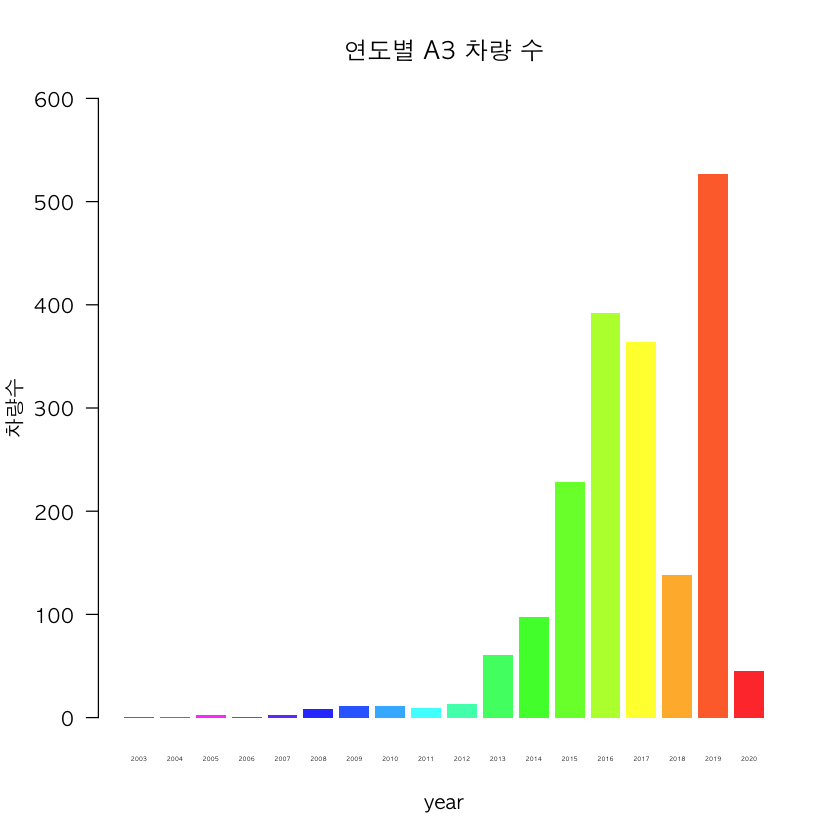

In [6]:
# 연도별 A3 판매량

par(family = 'AppleGothic')
options(warn = -1)

barplot(table(A3$year),
        main = '연도별 A3 차량 수',
        cex.names = 0.3,
        ylim = c(0,600),
        col = rev(rainbow(count(as.data.frame(unique(A3$year))), alpha = 0.85)),
        # horiz = T,
        las = 1,
        border = F,
        xlab = "year",
        ylab = "차량수"
       )

In [7]:
table(A3$transmission)


Automatic    Manual Semi-Auto 
      295      1088       530 

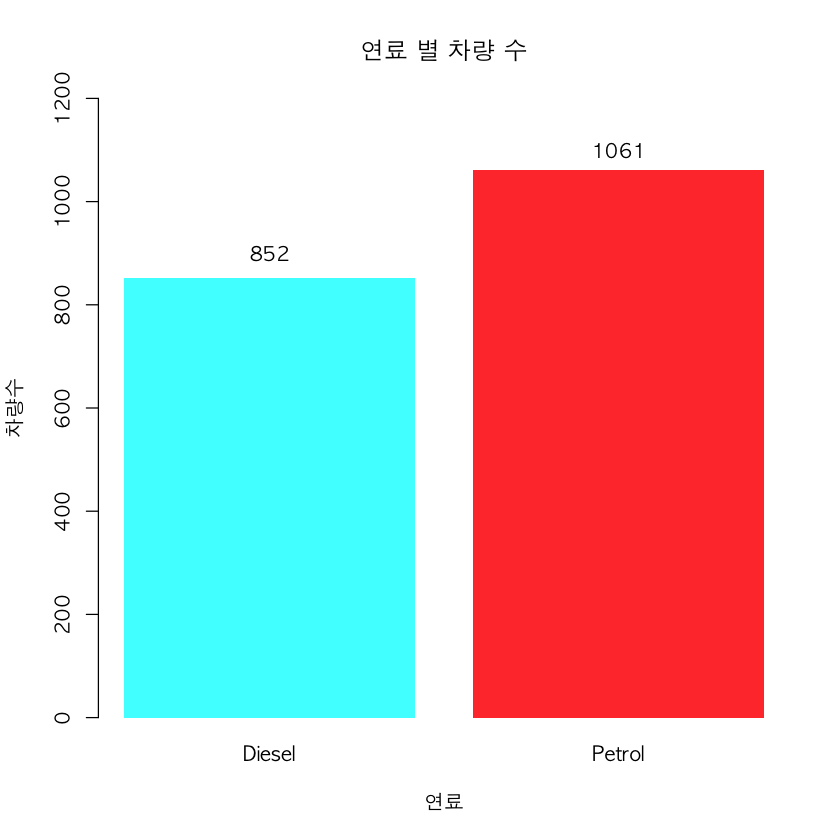

In [8]:
# transmission(변속기) 별 차량 수


# par(family = 'AppleGothic')
# options(warn = -1)

# tmBP <- barplot(table(A3$transmission),
#         main = "변속기 별 차량 수",
#         xlab = "변속기",
#         ylab = "차량수",
#         ylim = c(0,1200),
#         col = rev(rainbow(count(as.data.frame(unique(A3$transmission))), alpha = 0.85)),
#         border = F
#        )
# text(x=tmBP[1],900,table(A3$transmission)[1])
# text(x=tmBP[2],1100,table(A3$transmission)[2])
# text(x=tmBP[3],560,table(A3$transmission)[3])



par(family = 'AppleGothic')
options(warn = -1)

tmBP <- barplot(table(A3$fuelType),
        main = "연료 별 차량 수",
        xlab = "연료",
        ylab = "차량수",
        ylim = c(0,1200),
        col = rev(rainbow(count(as.data.frame(unique(A3$fuelType))), alpha = 0.85)),
        border = F
       )
text(x=tmBP[1],900,table(A3$fuelType)[1])
text(x=tmBP[2],1100,table(A3$fuelType)[2])
# text(x=tmBP[3],560,table(A3$transmission)[3])

In [9]:
library(plotrix)

In [10]:
table(A3$engineSize)


  0   1 1.2 1.4 1.5 1.6 1.8 1.9   2 2.5 
  7 101  19 344 299 479  29   4 628   3 

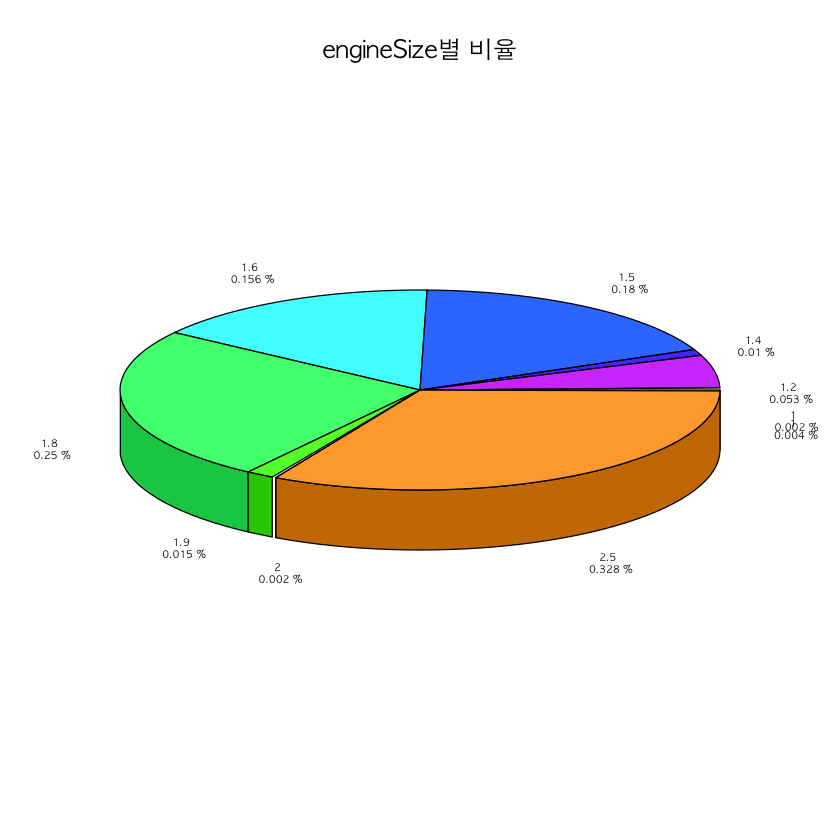

In [11]:
# engineSize 비율보기

par(family = 'AppleGothic')
options(warn = -1)

ratio_eS <- table(A3$engineSize)/sum(table(A3$engineSize))
name <- c(1,1.2,1.4,1.5,1.6,1.8,1.9,2,2.5)

pie3D(ratio_eS,
      main = "engineSize별 비율",
      labels = paste(name,"\n",round(ratio_eS,3),"%"),
      labelcex = 0.5,
      col = rev(rainbow(count(as.data.frame(unique(A3$engineSize))), alpha = 0.85))
     )

In [12]:
A3 <- subset(A3,!engineSize==0)

In [13]:
str(A3)

'data.frame':	1906 obs. of  7 variables:
 $ year        : int  2019 2015 2017 2017 2017 2014 2017 2015 2019 2015 ...
 $ price       : int  17300 10200 16100 16400 14500 13900 17100 11300 15700 15000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 2 2 2 1 1 2 2 2 1 ...
 $ mileage     : int  1998 46112 28955 21695 26156 30516 29545 75619 2029 56291 ...
 $ fuelType    : Factor w/ 2 levels "Diesel","Petrol": 2 2 2 2 2 2 1 1 2 2 ...
 $ mpg         : num  49.6 60.1 58.9 58.9 58.9 56.5 65.7 68.9 49.6 42.8 ...
 $ engineSize  : num  1 1.4 1.4 1.4 1.4 1.4 2 2 1 1.8 ...


In [14]:
table(A3$year)


2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
   1    1    2    1    3    8   11   11    9   13   61   97  228  390  363  138 
2019 2020 
 524   45 

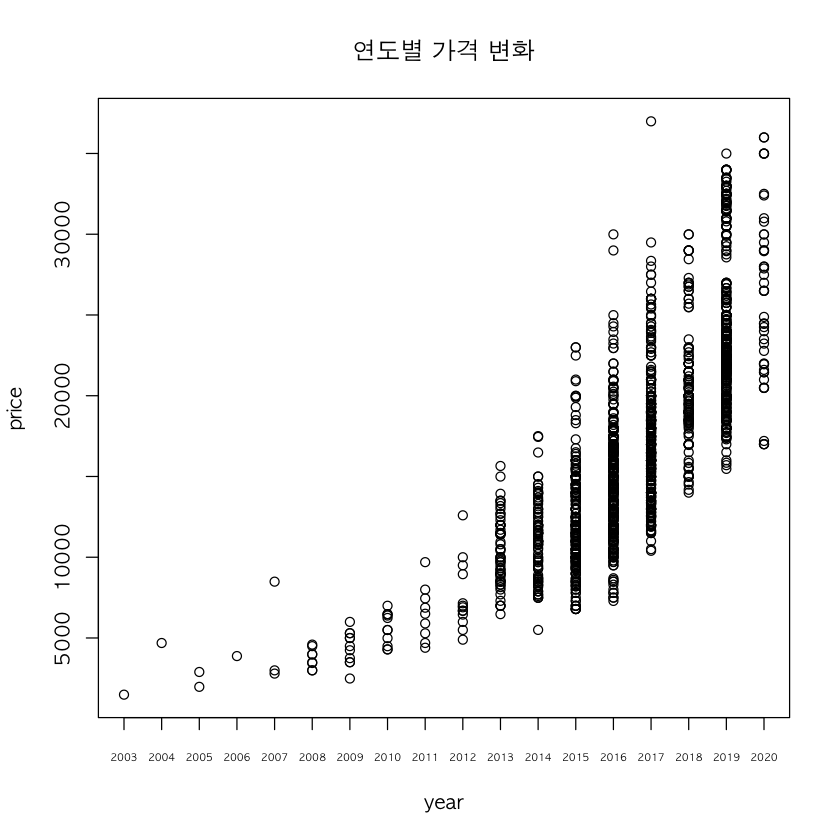

In [15]:
# 연도별 가격 변화

par(family = 'AppleGothic')
options(warn = -1)

plot(A3$year,A3$price,
     main = "연도별 가격 변화",
     xlab = "year",
     ylab = "price",
     xlim = c(2003,2020),
     xaxt = "n",
    )
xat = seq(2003,2020,by=1)
axis(side=1,at=xat,cex.axis=0.5)

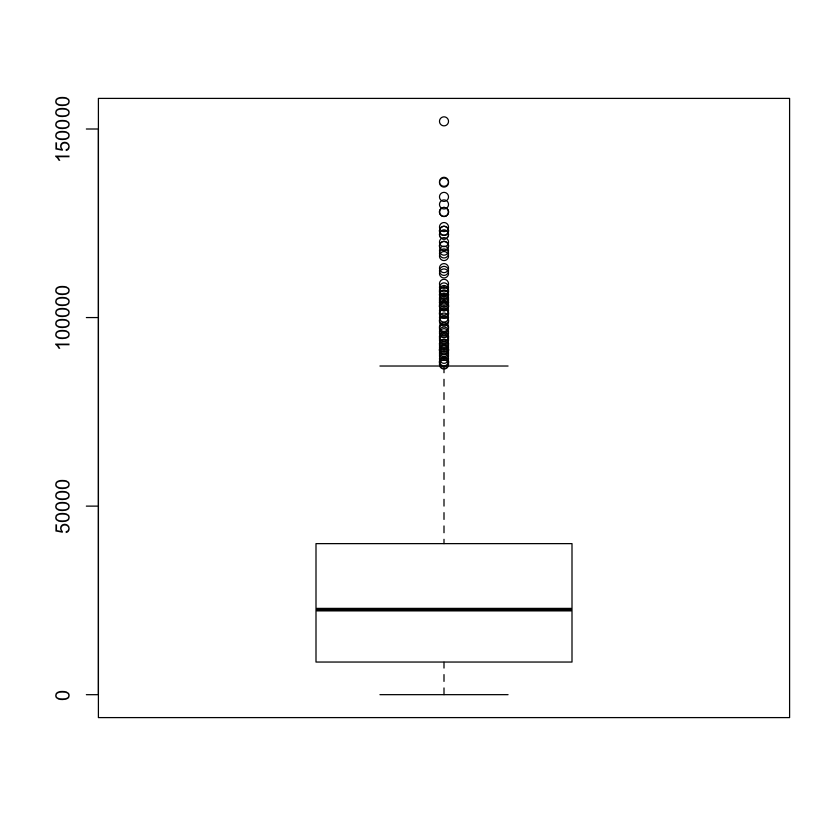

In [16]:
boxplot(A3$mileage)

In [17]:
test <- aggregate(mileage~transmission,A3,mean)
test_m <- test[,2]
test

transmission,mileage
Automatic,21702.39
Manual,34716.02
Semi-Auto,20395.26


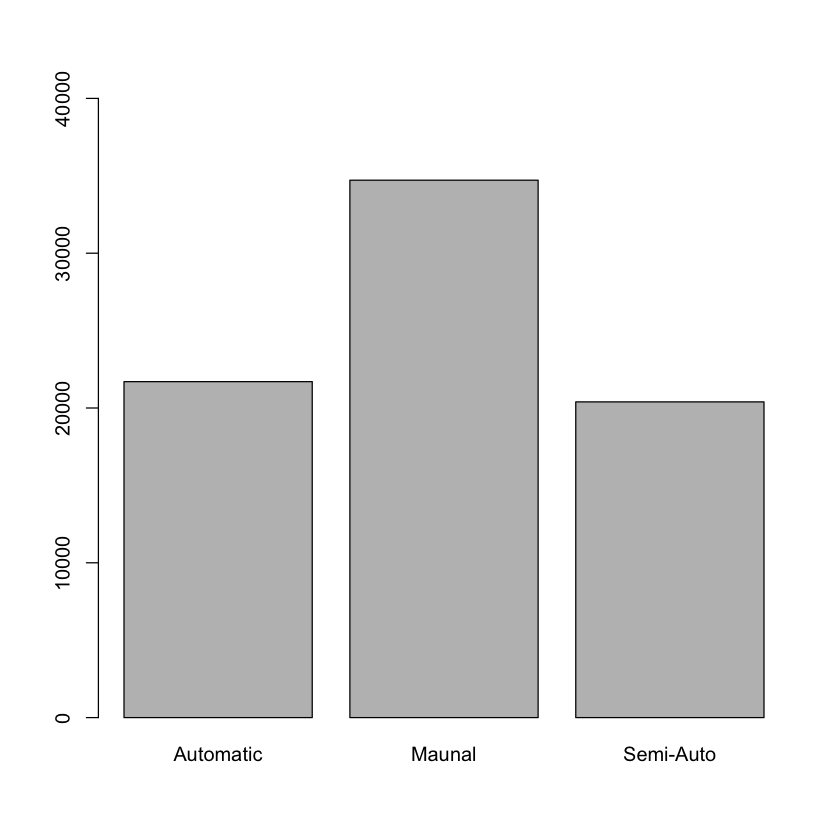

In [18]:
# 변속기 별 주행거리 평균

barplot(test_m,
        names = c('Automatic','Maunal','Semi-Auto'),
        ylim = c(0,40000)
       )

In [19]:
table(A3$engineSize)


  1 1.2 1.4 1.5 1.6 1.8 1.9   2 2.5 
101  19 344 299 479  29   4 628   3 

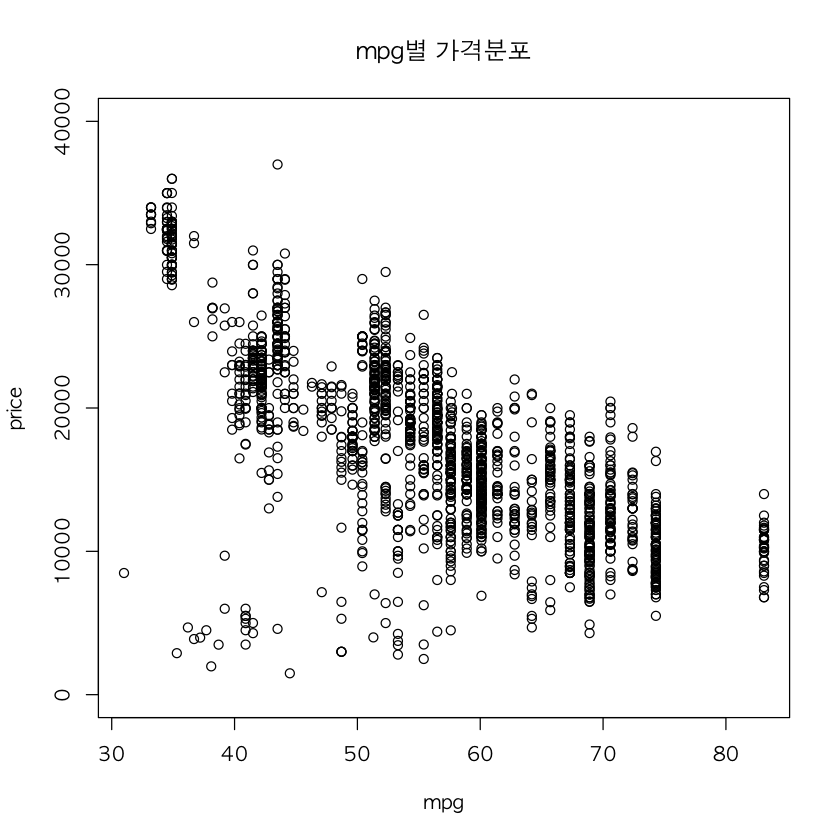

In [20]:
# mpg별 가격분포

par(family = 'AppleGothic')
options(warn = -1)

plot(A3$mpg,A3$price,
     main = "mpg별 가격분포",
     xlab = "mpg",
     ylab = "price",
     ylim = c(0,40000)
    )

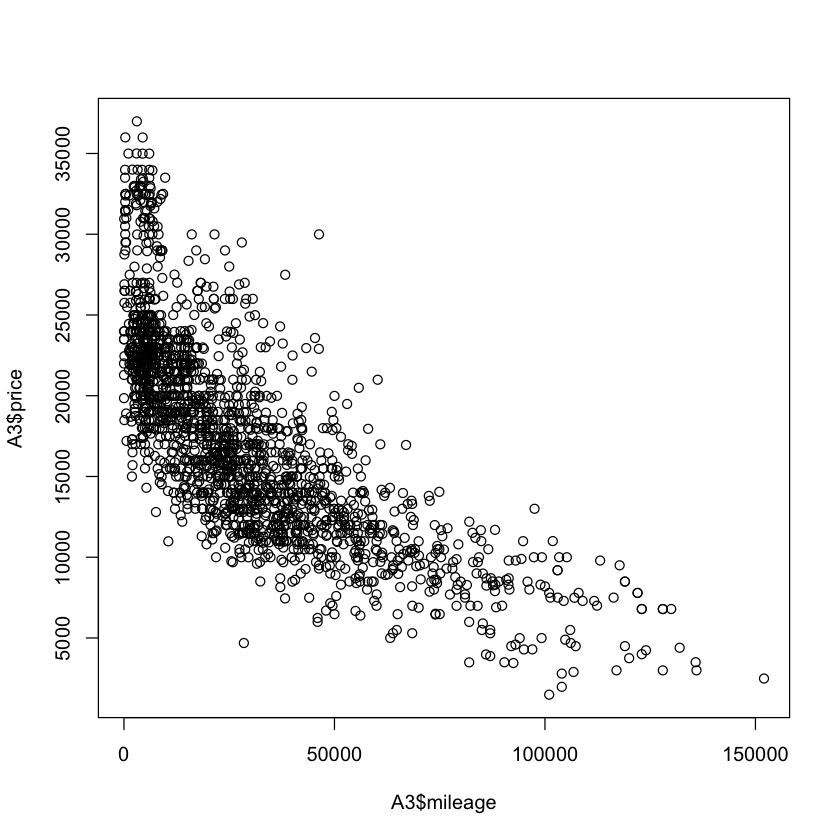

In [21]:
plot(A3$mileage,A3$price)

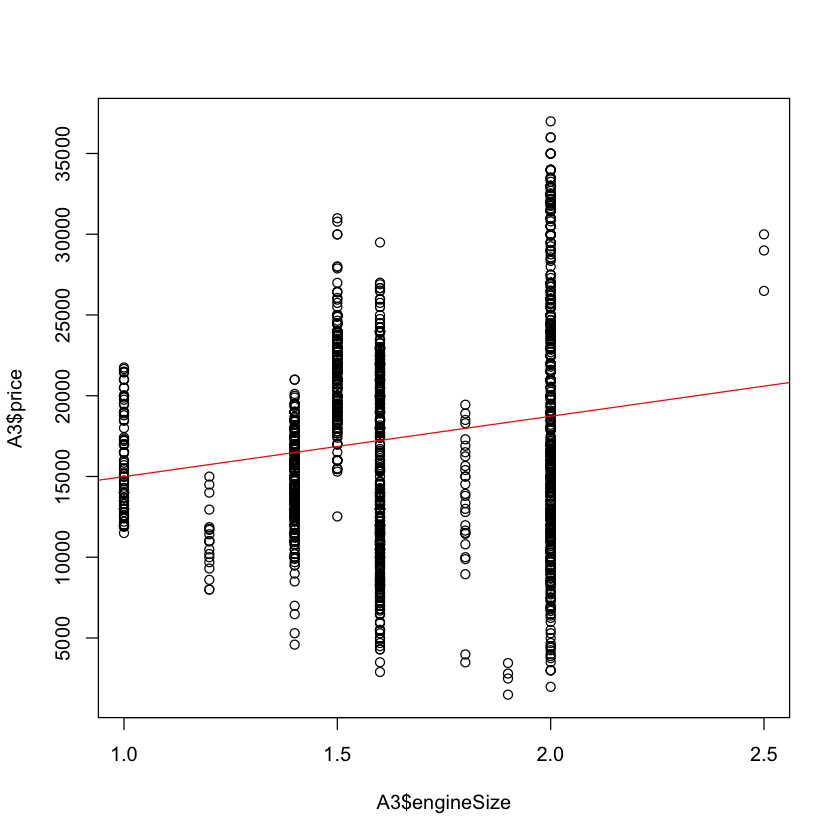

In [22]:
plot(A3$engineSize,A3$price)
r <- lm(A3$price ~ A3$engineSize)
abline(r, col = "red")

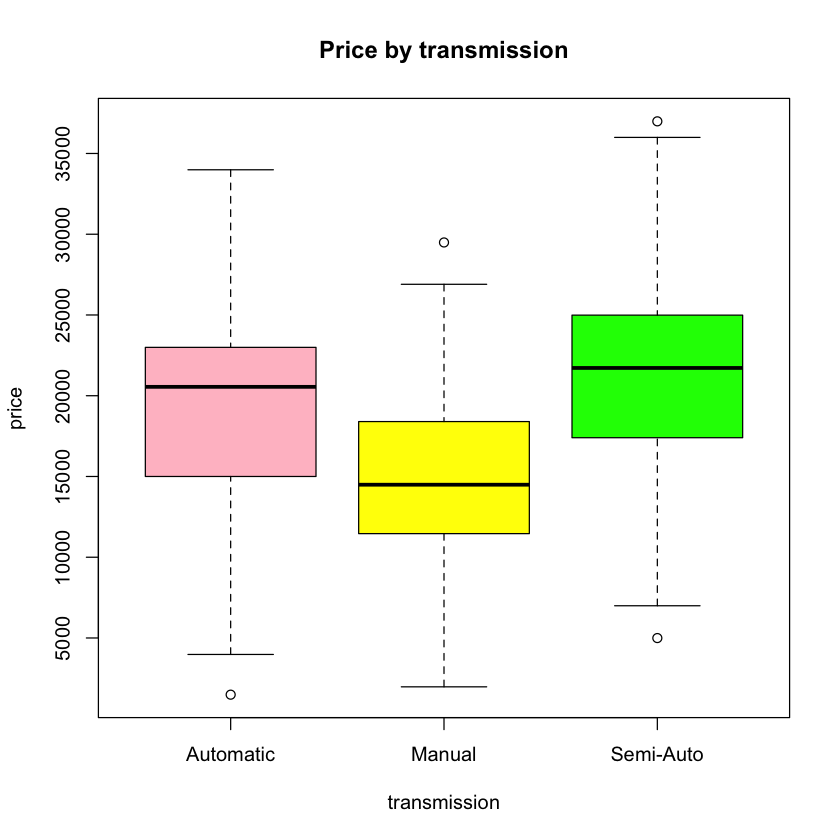

In [23]:
plot(A3$transmission,A3$price,
     main = "Price by transmission",
     xlab = "transmission",
     ylab = "price",
     col = c("pink","yellow","green")
    )

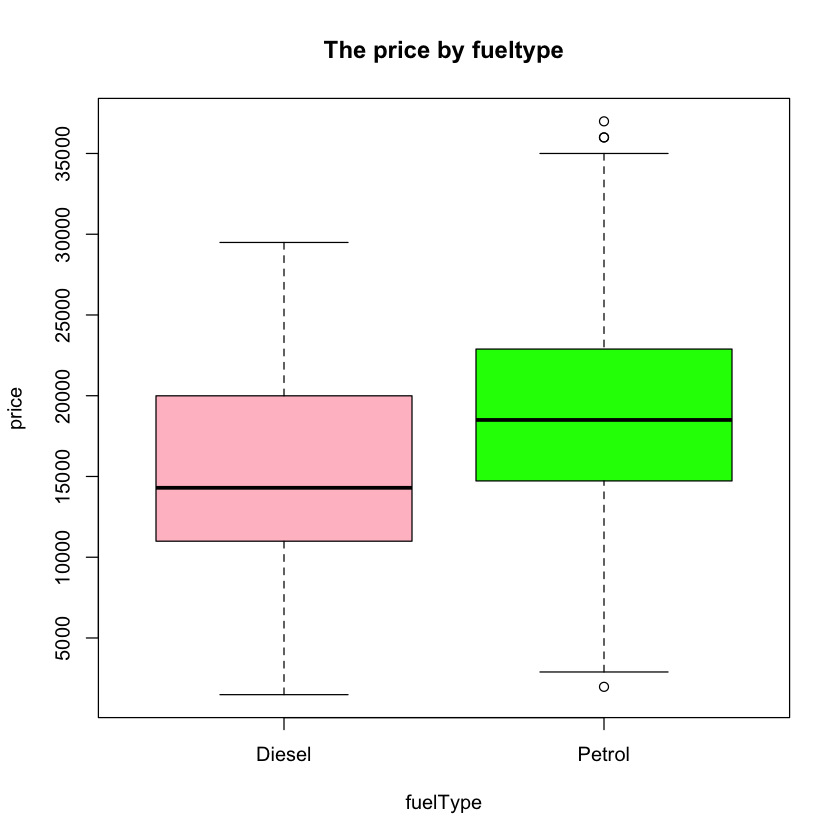

In [24]:
plot(A3$fuelType,A3$price,
     main = "The price by fueltype",
     xlab = "fuelType",
     ylab = "price",
     col = c("pink","green")
    )

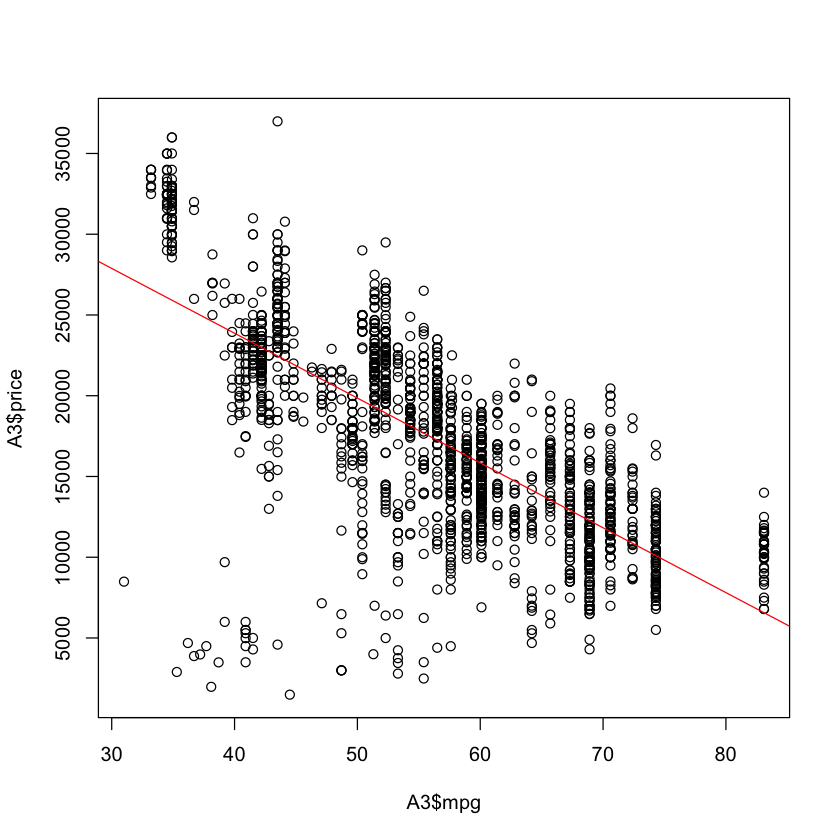

In [25]:
plot(A3$mpg,A3$price)
r <- lm(A3$price ~ A3$mpg)
abline(r, col = "red")

In [26]:
cor(A3$mpg,A3$price)

[1] -0.7240017

In [27]:
cor(A3$engineSize,A3$price)

[1] 0.1720131

In [28]:
cor(A3$mileage,A3$price)

[1] -0.7531273

In [29]:
cor(A3$year,A3$price)

[1] 0.7868213

In [30]:
str(A3)

'data.frame':	1906 obs. of  7 variables:
 $ year        : int  2019 2015 2017 2017 2017 2014 2017 2015 2019 2015 ...
 $ price       : int  17300 10200 16100 16400 14500 13900 17100 11300 15700 15000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 2 2 2 1 1 2 2 2 1 ...
 $ mileage     : int  1998 46112 28955 21695 26156 30516 29545 75619 2029 56291 ...
 $ fuelType    : Factor w/ 2 levels "Diesel","Petrol": 2 2 2 2 2 2 1 1 2 2 ...
 $ mpg         : num  49.6 60.1 58.9 58.9 58.9 56.5 65.7 68.9 49.6 42.8 ...
 $ engineSize  : num  1 1.4 1.4 1.4 1.4 1.4 2 2 1 1.8 ...


## one-Hot Encoding & age col. 추가

In [31]:
## age(연식) 컬럼 추가

A3$age <- 2020-A3$year

In [32]:
A3$Automatic[A3$transmission=='Automatic'] <- 1
A3$Automatic[!A3$transmission=='Automatic'] <- 0
A3$Manual[A3$transmission=='Manual'] <- 1
A3$Manual[!A3$transmission=='Manual'] <- 0
A3$Semi_Auto[A3$transmission=='Semi-Auto'] <- 1
A3$Semi_Auto[!A3$transmission=='Semi-Auto'] <- 0

In [33]:
A3$fuelType <- ifelse(A3$fuelType == "Petrol",1,0)

In [34]:
A3

,year,price,transmission,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1,2019,17300,Manual,1998,1,49.6,1.0,1,0,1,0
2,2015,10200,Manual,46112,1,60.1,1.4,5,0,1,0
3,2017,16100,Manual,28955,1,58.9,1.4,3,0,1,0
4,2017,16400,Manual,21695,1,58.9,1.4,3,0,1,0
5,2017,14500,Automatic,26156,1,58.9,1.4,3,1,0,0
6,2014,13900,Automatic,30516,1,56.5,1.4,6,1,0,0
7,2017,17100,Manual,29545,0,65.7,2.0,3,0,1,0
8,2015,11300,Manual,75619,0,68.9,2.0,5,0,1,0
9,2019,15700,Manual,2029,1,49.6,1.0,1,0,1,0
10,2015,15000,Automatic,56291,1,42.8,1.8,5,1,0,0


In [35]:
head(A3)
tail(A3)

year,price,transmission,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
2019,17300,Manual,1998,1,49.6,1.0,1,0,1,0
2015,10200,Manual,46112,1,60.1,1.4,5,0,1,0
2017,16100,Manual,28955,1,58.9,1.4,3,0,1,0
2017,16400,Manual,21695,1,58.9,1.4,3,0,1,0
2017,14500,Automatic,26156,1,58.9,1.4,3,1,0,0
2014,13900,Automatic,30516,1,56.5,1.4,6,1,0,0


,year,price,transmission,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1908,2016,16495,Semi-Auto,46600,0,57.6,2.0,4,0,0,1
1909,2016,14995,Manual,39750,1,57.6,1.4,4,0,1,0
1910,2013,12695,Manual,31500,1,53.3,1.4,7,0,1,0
1911,2020,16999,Manual,4018,1,49.6,1.0,0,0,1,0
1912,2020,16999,Manual,1978,1,49.6,1.0,0,0,1,0
1913,2020,17199,Manual,609,1,49.6,1.0,0,0,1,0


In [36]:
colSums(is.na(A3))

year        price transmission      mileage     fuelType          mpg 
           0            0            0            0            0            0 
  engineSize          age    Automatic       Manual    Semi_Auto 
           0            0            0            0            0

In [37]:
table(A3$fuelType)


   0    1 
 851 1055 

# test(K-means)

In [38]:
head(A3)

year,price,transmission,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
2019,17300,Manual,1998,1,49.6,1.0,1,0,1,0
2015,10200,Manual,46112,1,60.1,1.4,5,0,1,0
2017,16100,Manual,28955,1,58.9,1.4,3,0,1,0
2017,16400,Manual,21695,1,58.9,1.4,3,0,1,0
2017,14500,Automatic,26156,1,58.9,1.4,3,1,0,0
2014,13900,Automatic,30516,1,56.5,1.4,6,1,0,0


In [39]:
A3_opt <- A3[,-c(1,3)]
head(A3_opt)

price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
17300,1998,1,49.6,1.0,1,0,1,0
10200,46112,1,60.1,1.4,5,0,1,0
16100,28955,1,58.9,1.4,3,0,1,0
16400,21695,1,58.9,1.4,3,0,1,0
14500,26156,1,58.9,1.4,3,1,0,0
13900,30516,1,56.5,1.4,6,1,0,0


In [40]:
A3_opt1 <- subset(A3_opt,!age==0)
A3_opt1 <- subset(A3_opt1,!price>34000)

rownames(A3_opt1) <- c() 
head(A3_opt1)
tail(A3_opt1)

price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
17300,1998,1,49.6,1.0,1,0,1,0
10200,46112,1,60.1,1.4,5,0,1,0
16100,28955,1,58.9,1.4,3,0,1,0
16400,21695,1,58.9,1.4,3,0,1,0
14500,26156,1,58.9,1.4,3,1,0,0
13900,30516,1,56.5,1.4,6,1,0,0


,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1854,3750,120000,0,53.3,2.0,11,0,1,0
1855,9695,32300,1,39.2,2.0,9,0,1,0
1856,12995,23820,1,60.1,1.0,3,0,1,0
1857,16495,46600,0,57.6,2.0,4,0,0,1
1858,14995,39750,1,57.6,1.4,4,0,1,0
1859,12695,31500,1,53.3,1.4,7,0,1,0


In [41]:
nrow(A3_opt1)

[1] 1859

In [42]:
# A3_opt <- arrange(A3_opt,price,age,mileage)
# A3_opt

A3_opt1 <- arrange(A3_opt1,price,age,mileage)
A3_opt1

price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1490,101000,0,44.5,1.9,17,1,0,0
1975,104000,1,38.1,2.0,15,0,1,0
2490,152034,0,55.4,1.9,11,0,1,0
2795,104000,0,53.3,1.9,13,0,1,0
2895,106790,1,35.3,1.6,15,0,1,0
2995,117000,0,48.7,2.0,12,0,1,0
2995,136000,0,48.7,2.0,12,0,1,0
2995,128000,0,48.7,2.0,13,0,1,0
3450,92500,0,53.3,1.9,12,0,1,0
3490,82000,1,38.7,1.8,12,0,1,0


In [43]:
# A3.kmeans <- kmeans(A3_opt[,1],centers = 3, iter.max = 10000)
# A3.kmeans$centers

A3.kmeans1 <- kmeans(A3_opt1[,1],centers = 3, iter.max = 10000)
A3.kmeans1$centers

20295.08
11968.71
28783.62


In [44]:
# A3_opt$cluster <- as.factor(A3.kmeans$cluster)

A3_opt1$cluster <- as.factor(A3.kmeans1$cluster)

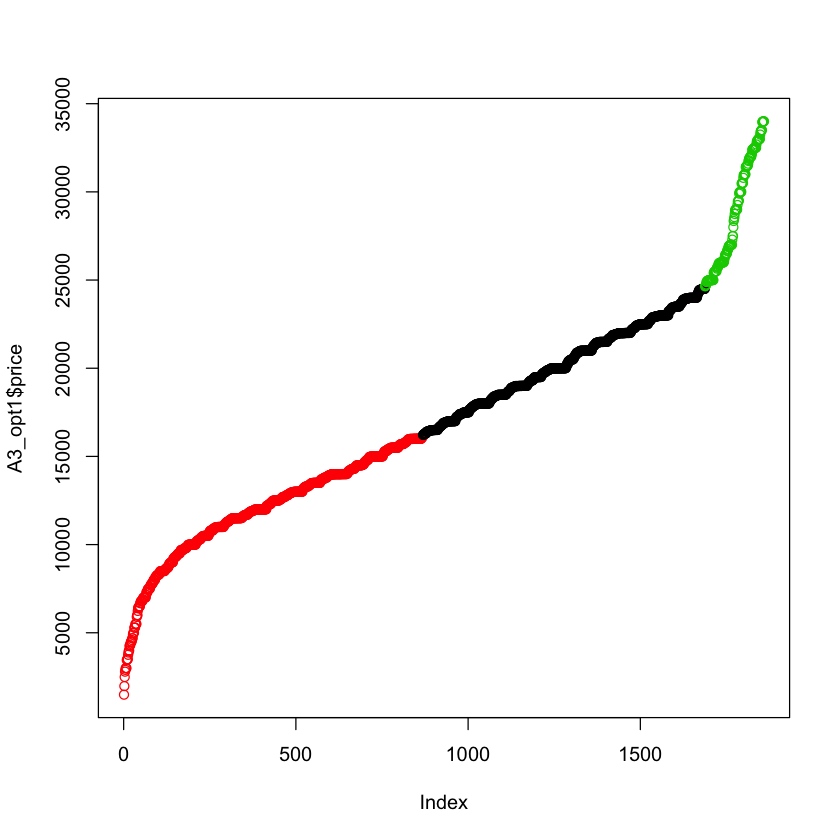

In [45]:
# plot(A3_opt$price,col=A3_opt$cluster)

plot(A3_opt1$price,col=A3_opt1$cluster)

In [46]:
table(A3_opt1$cluster)


  1   2   3 
819 868 172 

> center = 3 

>  1     2     3       
>731   477     698     

> center = 4      

>  1   2   3   4      
>652 664 432 158     

> center = 5     

>  1   2   3   4    5       
>403 417  92 153 399 395   

> center = 3 일 때, 잘 나누어짐 => 적절한 데이터라고 할 수 있음

In [47]:
rownames(A3_opt1) <- c()

In [48]:
A3_opt1$cluster <- NULL

In [49]:
head(A3_opt)
head(A3_opt1)

price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
17300,1998,1,49.6,1.0,1,0,1,0
10200,46112,1,60.1,1.4,5,0,1,0
16100,28955,1,58.9,1.4,3,0,1,0
16400,21695,1,58.9,1.4,3,0,1,0
14500,26156,1,58.9,1.4,3,1,0,0
13900,30516,1,56.5,1.4,6,1,0,0


price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1490,101000,0,44.5,1.9,17,1,0,0
1975,104000,1,38.1,2.0,15,0,1,0
2490,152034,0,55.4,1.9,11,0,1,0
2795,104000,0,53.3,1.9,13,0,1,0
2895,106790,1,35.3,1.6,15,0,1,0
2995,117000,0,48.7,2.0,12,0,1,0


In [50]:
summary(A3_opt1)

     price          mileage          fuelType           mpg       
 Min.   : 1490   Min.   :     5   Min.   :0.0000   Min.   :31.00  
 1st Qu.:12699   1st Qu.:  9518   1st Qu.:0.0000   1st Qu.:49.60  
 Median :16900   Median : 23760   Median :1.0000   Median :56.50  
 Mean   :17193   Mean   : 29381   Mean   :0.5524   Mean   :56.32  
 3rd Qu.:21495   3rd Qu.: 40904   3rd Qu.:1.0000   3rd Qu.:64.20  
 Max.   :34000   Max.   :152034   Max.   :1.0000   Max.   :83.10  
   engineSize         age           Automatic          Manual      
 Min.   :1.000   Min.   : 1.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.500   1st Qu.: 1.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.600   Median : 3.000   Median :0.0000   Median :1.0000  
 Mean   :1.648   Mean   : 3.347   Mean   :0.1544   Mean   :0.5702  
 3rd Qu.:2.000   3rd Qu.: 4.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :2.500   Max.   :17.000   Max.   :1.0000   Max.   :1.0000  
   Semi_Auto     
 Min.   :0.0000  
 1st Qu.:0.0000  
 

In [51]:
A3_opt1.scale <- as.data.frame(scale(A3_opt1))

In [52]:
A3_opt1.scale$price <- A3_opt1$price

In [53]:
head(A3_opt1.scale)

price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1490,2.832709,-1.1107254,-1.05718463,0.8820257,6.283801,2.3397448,-1.1514967,-0.6163599
1975,2.951366,0.8998282,-1.62968555,1.2326856,5.363303,-0.4271671,0.8679678,-0.6163599
2490,4.851224,-1.1107254,-0.08214399,0.8820257,3.522306,-0.4271671,0.8679678,-0.6163599
2795,2.951366,-1.1107254,-0.26999586,0.8820257,4.442804,-0.4271671,0.8679678,-0.6163599
2895,3.061717,0.8998282,-1.88015471,-0.1699541,5.363303,-0.4271671,0.8679678,-0.6163599
2995,3.465547,-1.1107254,-0.68148090,1.2326856,3.982555,-0.4271671,0.8679678,-0.6163599


In [54]:
A3_opt$cluster <- NULL

In [55]:
samp <- sample(1:nrow(A3_opt),round(nrow(A3_opt)*0.7))
samp1 <- sample(1:nrow(A3_opt1.scale),round(nrow(A3_opt1.scale)*0.7))

In [56]:
samp
samp1

[1] 1620  297 1189  421 1230 1694 1191 1738    2  635 1477 1571 1512  143
  [15]  374 1050  922  215 1854 1504  548  123 1652 1740 1341   35   41  506
  [29] 1863  492  364 1523  163  608 1802 1860 1479 1348 1204 1833 1809 1472
  [43]  640 1060  730  920 1163 1664 1421  520 1260 1359 1040 1170   95 1823
  [57]  831  863  933 1730  842  879 1081 1238 1013 1888  982 1848 1816 1667
  [71]  341 1115  298  632  883  171  558  648  125 1492  371 1375  758  108
  [85] 1347  771  429  777 1295 1105  390  547  258   77 1641 1369   88 1211
  [99]  114  261  963  544  480 1832  224  513 1805 1789   46  616 1366  196
 [113] 1428 1415 1691  454 1196 1372  311 1037  396 1894  955  596 1590  574
 [127] 1212 1176  602   81  741 1838 1376  992   15  376  865 1356  678 1695
 [141]  221 1482  594 1827 1904  491  761   18  995  783 1533 1768 1572  245
 [155] 1271  575  756 1897  275  891  494 1100  600  206 1403  894 1355  737
 [169]  182  832  912  385 1587 1434 1455 1118 1379  242  366 1073 1022  452
 [183] 1882  416 1388 1008  276 1612  721  545 1215 1481 1534 1607  627  841
 [197] 1110  370 1689  623  424  294  893 1178 1688 1246 1463  360  198  849
 [211] 1905 1352  624  817 1411  321 1287  232   70 1698 1272 1892  166  264
 [225]  819  571  487  859 1017   45 1326 1461  944 1320  368 1663 1728  790
 [239] 1565 1462 1068  400  237 1811  962  195  710  672  531    4 1402  223
 [253]  442  140  169  418 1626  345  903  691   39  365  248 1529  485  873
 [267]   27  657  381  117  789  499 1097 1900  714  675 1208 1330  718 1437
 [281] 1581 1070  734  469  340  405  296 1473  767 1198  660  417  271 1084
 [295]   57 1183 1724  848  954 1765 1450 1725 1760 1092  476  747 1145 1759
 [309] 1723  133  684  557  569   86  985 1169  456   32 1855 1762  481  961
 [323]  408  216  121 1812   63  892 1351  358 1648  285 1141  878 1729  231
 [337] 1563 1378    7  247  812  490 1250  738  723  501  967 1433  551 1821
 [351] 1296 1858   55 1687  708  130 1684 1387 1214 1067 1256 1269 1044  772
 [365] 1416 1604 1062 1544  959 1615  870   26  257 1127  665 1585 1758 1381
 [379]  529 1586  630  428 1754  226  969 1122  422  856  974 1443  448 1276
 [393]  525 1063  102  735   59  503  979 1808  645  203 1485  325  620 1350
 [407]  968 1075  889  267  614  527  447  559  286  220  197  272 1743  820
 [421] 1709 1441  475 1753 1606 1327  344 1639  580  916 1875 1149 1449 1722
 [435]  307 1803 1234 1093 1187  805  270 1427 1510  792 1294 1140  489  484
 [449]  619 1850  280 1439 1567 1324 1788 1881 1464 1777  829  586 1636 1592
 [463] 1282  990 1625  727  382  828 1561 1300  784 1879   11 1086  426 1202
 [477] 1834 1299 1172  716 1151 1349 1031  888 1862  388 1717  410 1096 1903
 [491] 1200  288 1224  541  796  124 1868  432 1001 1128  703  868 1734 1559
 [505]  887  617  160  994  639 1796  736 1456  397 1025 1417  543   53 1334
 [519] 1557  282  508  116 1708  726  463  786  284 1755 1488   24 1660 1896
 [533]  372  111  538  711 1653  524 1179  609  331  189 1346 1665  816 1672
 [547] 1103 1195 1148  406  694 1305  334  701  972 1661 1396 1697  562 1005
 [561]  611 1030 1514  744 1783 1297  696 1408  720  191  651  904  687   97
 [575]  250  277 1501  847  190 1716  135 1497 1580 1480 1727 1205  430  576
 [589] 1845 1853 1414  510 1263 1677  234  987  401 1452  306  731  598  583
 [603]  131  134   82   34  712  956  420   60 1841   65 1558   49 1236 1852
 [617]  402 1154  936 1124 1156  591 1836  997 1506  419 1818 1535 1582 1484
 [631]  505  292 1228  957 1028  844 1139  749   42  317  555  212 1370  230
 [645]  236 1410 1810  748 1424  592  991  561 1516  871  823 1203 1624  713
 [659]  931  667  367   13 1739 1245  757 1261  409  295  320 1491  782  876
 [673]   22  118 1362 1870 1006  440  852 1537 1554  208 1004   99  435  300
 [687] 1000 1057  431 1032 1467 1420  274 1306 1776 1876  949 1825 1143  584
 [701] 1713  519 1710 1814   43  433  188  978  315  303 1371  698  941 1678
 [715]  929 1542  943  477 1813  461 1312 1436  802  866 1257  233  834 1680

[1]   78  513  722 1815 1236 1170 1291  156  314  796  975  270 1434  634
  [15] 1414 1494  690  296  480 1435 1097  106 1447  749 1658 1354 1128 1613
  [29] 1638  147  759  331 1108 1555 1487 1308 1220 1461 1546 1537  475  514
  [43]  227  782  660  890  191 1763  245  124  828 1481 1189 1254  823  653
  [57]  986 1024 1171 1426 1724 1217  647  614 1423 1559 1006  553  721  556
  [71] 1656  963  730 1850 1821  757 1290  996 1794  375 1679 1793  239   50
  [85]  665   39 1846 1135 1468 1243   54  558 1650 1809 1496 1040 1400  982
  [99] 1506  318  325 1539 1394 1700  573  941 1311   67 1429    8  149 1582
 [113]  211  693  765  971  992  580 1602  577 1265  462 1690  259 1805  715
 [127] 1365 1182  234   88   38  894  687  218 1214 1367  163 1239 1177   96
 [141] 1070 1712 1703 1241 1579  430  763  625  743  589  741 1769 1605  166
 [155]  104  871 1115  908  158 1085 1512 1751  734  321 1345 1732  576 1066
 [169] 1824 1723 1841 1327  488 1356 1474  333  238  661 1668  402 1096  136
 [183] 1534 1034 1225  252 1155 1172 1721 1767  114  108  767 1167 1819  781
 [197]  562 1147  505  995 1062 1259  426 1859  511  534  494 1462 1194 1446
 [211] 1250 1722 1208 1741   26  474  139  435  720  638 1206  204 1645  777
 [225]  932  889  954 1101  510  914 1585  758  590  680  190 1219 1467 1000
 [239] 1406  473  588 1653  201  696  887  644 1756 1335 1654  151 1624  175
 [253] 1601   22  530 1729 1829 1524  354  465 1544 1773 1800 1470 1103  233
 [267]  635  533 1284  280 1764  667  311 1392 1151  753  584 1693  672 1517
 [281] 1388 1831 1082  138  619  210 1401 1739 1270  489   42  241 1114  650
 [295] 1366 1198 1054 1445 1341 1124  187 1838  604 1312 1755  137 1373 1372
 [309] 1122 1609  367 1765  751  168  712  745 1148 1780 1752 1246 1593  297
 [323]  714  681  538 1508  351  419  600  189 1718 1163   86  754   69 1760
 [337] 1565 1242  783  379  384 1361  118  719  602 1584 1671  962 1803 1535
 [351] 1509  364  444 1748  919  359  481  499 1229 1699 1697  567  924  446
 [365]  998  412  449 1069 1852  551  907 1643  459 1536  519  805 1357 1777
 [379]  727  343   75  896 1727 1393  450 1706 1501 1754  774 1049  262  575
 [393]   48 1021   40  292  228 1542 1685 1686  171   21  349  281 1436 1822
 [407]  103 1319  401 1132 1143 1140  425 1691 1039  253 1683  778  762  186
 [421]  312  694  738 1667 1597  447 1532 1255 1676  154  272  866  242 1545
 [435] 1719  831  123  264 1134 1669  942 1688  248  835  501  656 1306  847
 [449]  673  888  113  497  413  601 1149   82  268 1142  214  920 1154  564
 [463] 1415 1320  948  799  927  819    1   65 1595 1252   32   19 1322  372
 [477] 1410 1790 1480 1374  549 1405 1050  978 1677  658  923 1745 1444  200
 [491] 1340  683 1294 1019   11  484 1631  930 1013 1466 1629 1282  405 1678
 [505]  455  307 1519  704  408 1853 1222 1325  868 1404  251  811 1202 1642
 [519]  885 1093 1441 1175  952  877  300   35  432 1071  360  235  806  231
 [533] 1057 1801 1353  393  541  984  219   44 1026 1523 1064  356  395 1277
 [547] 1387 1655  290  437 1035 1212  631  876  739   27 1409  240  146  443
 [561]  616  731  205 1791 1573  396    6  539  951 1298  929 1075 1770 1234
 [575]  102 1339 1223   91   76 1267 1348 1047 1695 1280 1775 1418  879    2
 [589] 1109 1300 1129  844 1051  243  775  140 1116  265  740 1368   45  261
 [603] 1610 1031  125 1781  361  485 1084  310  527  400 1110 1181 1263  953
 [617]  273  517  198 1257 1720  931 1570  232 1386  854  897  983  910  698
 [631]  386 1834   81  797 1029  157  295 1007 1002  543  695  406 1072 1191
 [645] 1158  969 1515 1543  943 1099 1566  164  933   74  304 1379 1458  750
 [659]  858   80 1623  482  613 1095   87  328  784 1048 1408  531  636  632
 [673]  282 1224  788 1106 1644  873 1807 1328  956 1362 1491 1329  607 1589
 [687]  724  317 1272 1420  458 1238 1475 1179 1347  922  947 1141  591 1359
 [701]  172  179  760  808  524  342 1701 1823 1030 1581 1133  411   60 1011
 [715] 1184    4 1138  177  973  199  217   37 1385 1301 1287  271  702  861

In [57]:
data.tr <- A3_opt[samp,]
data.test <- A3_opt[-samp,]

data.tr1 <- A3_opt1.scale[samp1,]
data.test1 <- A3_opt1.scale[-samp1,]

In [58]:
head(data.tr)
head(data.tr1)

,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1626,10955,37920,0,68.9,2.0,4,0,1,0
297,16950,67000,0,74.3,1.6,4,0,1,0
1189,20400,4628,0,51.4,1.6,1,0,1,0
421,18698,8763,1,60.1,1.4,3,0,1,0
1230,17000,19000,1,50.4,2.0,2,0,1,0
1700,24750,2500,0,52.3,1.6,1,1,0,0


,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
78,7690,1.90045960,-1.1107254,1.60852281,-0.1699541,1.2210593,-0.4271671,0.8679678,-0.6163599
513,13000,-0.03725013,0.8998282,0.33828638,-2.2739135,-0.1596884,-0.4271671,0.8679678,-0.6163599
722,14990,0.40110869,0.8998282,0.33828638,-0.8712739,0.7608101,-0.4271671,0.8679678,-0.6163599
1815,31795,-1.04199877,0.8998282,-1.95171732,1.2326856,-1.0801869,-0.4271671,-1.1514967,1.6215561
1236,19930,-0.48565525,0.8998282,-1.26292715,-0.5206140,-1.0801869,2.3397448,-1.1514967,-0.6163599
1170,19000,-0.32519132,0.8998282,0.01625461,-0.8712739,-0.1596884,-0.4271671,0.8679678,-0.6163599


In [59]:
# data.tr의 문제, 정답 만들기 

data.tr.x <- data.tr[,-1]
data.tr.y <- data.tr[,1]

data.tr.x1 <- data.tr1[,-1]
data.tr.y1 <- data.tr1[,1]

In [60]:
head(data.test)
head(data.test1)

,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1,17300,1998,1,49.6,1.0,1,0,1,0
5,14500,26156,1,58.9,1.4,3,1,0,0
6,13900,30516,1,56.5,1.4,6,1,0,0
12,10600,37840,0,70.6,1.6,4,0,1,0
14,18950,17992,1,54.3,1.5,2,0,1,0
16,12500,19494,0,67.3,2.0,4,0,1,0


,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
9,3450,2.496514,-1.1107254,-0.2699959,0.8820257,3.982555,-0.4271671,0.8679678,-0.6163599
13,3750,3.584204,-1.1107254,-0.2699959,1.2326856,3.522306,-0.4271671,0.8679678,-0.6163599
14,3880,2.278976,0.8998282,-1.7549201,1.2326856,4.903053,-0.4271671,0.8679678,-0.6163599
15,3980,2.239423,0.8998282,-1.7101935,0.5313658,3.982555,2.3397448,-1.1514967,-0.6163599
17,4240,3.742413,-1.1107254,-0.2699959,1.2326856,3.522306,-0.4271671,0.8679678,-0.6163599
18,4290,2.595395,0.8998282,-1.3255444,-0.1699541,3.062056,-0.4271671,0.8679678,-0.6163599


In [61]:
# data.test의 문제, 정답 만들기 

data.test.x <- data.test[,-1]
data.test.y <- data.test[,1]

data.test.x1 <- data.test1[,-1]
data.test.y1 <- data.test1[,1]

In [62]:
# 모델학습 
# 라이브러리 import 
library(caret) 
library(e1071) 
library(party) 
library(nnet) 
library(randomForest) 

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



## 다중선형회귀모델

In [63]:
# 모델 만들기 
model_lm <- lm(price ~ ., data = data.tr)
model_lm

model_lm1 <- lm(price ~ ., data = data.tr1)
model_lm1


Call:
lm(formula = price ~ ., data = data.tr)

Coefficients:
(Intercept)      mileage     fuelType          mpg   engineSize          age  
  2.405e+04   -6.205e-02    1.047e+03   -1.533e+02    5.162e+03   -1.319e+03  
  Automatic       Manual    Semi_Auto  
 -9.618e+02   -1.569e+03           NA  



Call:
lm(formula = price ~ ., data = data.tr1)

Coefficients:
(Intercept)      mileage     fuelType          mpg   engineSize          age  
    17201.6      -1425.5        576.3      -1793.5       1519.4      -2877.3  
  Automatic       Manual    Semi_Auto  
     -184.0       -708.9           NA  


In [64]:
summary(model_lm)


Call:
lm(formula = price ~ ., data = data.tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-6110.3 -1421.4   -46.5  1356.1  7038.3 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.405e+04  8.691e+02  27.674  < 2e-16 ***
mileage     -6.205e-02  3.682e-03 -16.849  < 2e-16 ***
fuelType     1.047e+03  1.893e+02   5.528 3.89e-08 ***
mpg         -1.533e+02  8.756e+00 -17.512  < 2e-16 ***
engineSize   5.162e+03  2.761e+02  18.697  < 2e-16 ***
age         -1.319e+03  4.108e+01 -32.120  < 2e-16 ***
Automatic   -9.618e+02  1.865e+02  -5.157 2.90e-07 ***
Manual      -1.569e+03  1.531e+02 -10.245  < 2e-16 ***
Semi_Auto           NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2099 on 1326 degrees of freedom
Multiple R-squared:  0.8827,	Adjusted R-squared:  0.882 
F-statistic:  1425 on 7 and 1326 DF,  p-value: < 2.2e-16


In [65]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model_lm, newdata = data.tr.x)
pred_tr1 <- predict(model_lm1, newdata = data.tr.x1)

In [66]:
predicted <- pred_tr
correct <- data.tr.y

predicted1 <- pred_tr1
correct1 <- data.tr.y1

In [67]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.8826522

In [68]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)
library(Metrics)
mae(correct1, predicted1)


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



[1] 1643.868

In [69]:
# 테스트 데이터 성능 

pred_test <- predict(model_lm, newdata = data.test.x)

In [70]:
predicted <- pred_test
correct <- data.test.y

In [71]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.8867904

In [72]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1680.426

> -0.005차이 

## 인공신경망

In [73]:
# Model 만들기

model.nnet <- nnet(price ~ ., data=data.tr1, size=12, linout = T)

# weights:  121
initial  value 433135486176.448669 
iter  10 value 38459098766.454536
iter  20 value 25082075359.172577
iter  30 value 17963046957.762833
iter  40 value 16199751266.700586
iter  50 value 11651664647.179262
iter  60 value 11154899830.813345
iter  70 value 10755130215.500813
iter  80 value 10596085198.806423
iter  90 value 10408260133.644566
iter 100 value 10390042567.571173
final  value 10390042567.571173 
stopped after 100 iterations


In [74]:
# 문제 풀기 

pred_tr1 <- predict(model.nnet, newdata = data.tr.x1,type="raw")

In [75]:
predicted1 <- pred_tr1
correct1 <- data.tr.y1

In [76]:
# 정확도 구하기 
r1 = 1 - (sum((correct1 - predicted1)^2) / sum((correct1 - mean(correct1))^2))
r1

[1] 0.7828966

In [77]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct1, predicted1)

[1] 2239.326

In [78]:
# 테스트 데이터 성능 

pred_test1 <- predict(model.nnet, newdata = data.test.x1,type="raw")

In [79]:
predicted1 <- pred_test1
correct1 <- data.test.y1

In [80]:
# 정확도 구하기 
r1 = 1 - (sum((correct1 - predicted1)^2) / sum((correct1 - mean(correct1))^2))
r1

[1] 0.780615

In [81]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct1, predicted1)

[1] 2225.549

## 의사결정나무

In [82]:
# Model 만들기

model.ctree <- ctree(price ~., data=data.tr)

In [83]:
# 문제 풀기 

pred_tr <- predict(model.ctree, newdata = data.tr.x)

In [84]:
predicted <- pred_tr
correct <- data.tr.y

In [85]:
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.91769

In [86]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1368.697

In [87]:
# 테스트 데이터 성능 

pred_test <- predict(model.ctree, newdata = data.test.x)

In [88]:
predicted <- pred_test
correct <- data.test.y

In [89]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.8833069

In [90]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1645.543

> 0.03 차이

## 랜덤포레스트

In [91]:
# Model 만들기 
model.rf <- randomForest(price ~ ., data = data.tr, ntree=100)

In [92]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model.rf, newdata = data.tr.x)

In [93]:
predicted <- pred_tr
correct <- data.tr.y

In [94]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.9387981

In [95]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1207.32

In [96]:
# 테스트 데이터 성능 

pred_test <- predict(model.rf, newdata = data.test.x)

In [97]:
predicted <- pred_test
correct <- data.test.y

In [98]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.9128649

In [99]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1474.821

> 0.03차이

# SVM

In [100]:
# Model 만들기 
model.svm = svm(price ~., data=data.tr)

In [101]:
# 트레이닝 데이터 성능 
pred_tr <- predict(model.svm, newdata = data.tr.x)

In [102]:
predicted <- pred_tr
correct <- data.tr.y

In [103]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.920873

In [104]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1294.906

In [105]:
# 테스트 데이터 성능 

pred_test <- predict(model.svm, newdata = data.test.x)

In [106]:
predicted <- pred_test
correct <- data.test.y

In [107]:
# 정확도 구하기 
r = 1 - (sum((correct - predicted)^2) / sum((correct - mean(correct))^2))
r

[1] 0.9153256

In [108]:
# 회귀식의 평균 절대 오차 (Mean Absolute Error)

mae(correct, predicted)

[1] 1400.54

> -0.007차이



# 최종 모델 선정하기 => SVM

In [109]:
A3.svm <- subset(A3,!age==0)
A3.svm <- A3.svm[,-c(1,3)]
A3.svm

,price,mileage,fuelType,mpg,engineSize,age,Automatic,Manual,Semi_Auto
1,17300,1998,1,49.6,1.0,1,0,1,0
2,10200,46112,1,60.1,1.4,5,0,1,0
3,16100,28955,1,58.9,1.4,3,0,1,0
4,16400,21695,1,58.9,1.4,3,0,1,0
5,14500,26156,1,58.9,1.4,3,1,0,0
6,13900,30516,1,56.5,1.4,6,1,0,0
7,17100,29545,0,65.7,2.0,3,0,1,0
8,11300,75619,0,68.9,2.0,5,0,1,0
9,15700,2029,1,49.6,1.0,1,0,1,0
10,15000,56291,1,42.8,1.8,5,1,0,0


# Machine Learning => SVM 결정

In [110]:
model.svm = svm(price ~., data=A3.svm)

In [111]:
# 모델 저장

saveRDS(model.svm,"./Data/Audi_A3_SVM.rds")

In [112]:
A3_svm <- readRDS("./Data/Audi_A3_SVM.rds")

In [113]:
predict(A3_svm,(data.frame(mileage=1998,fuelType =1,mpg =49.6,engineSize=1.0,age=1,Automatic =0,Manual=1,Semi_Auto=0)))

1 
19795.08

In [114]:
write.csv(A3_opt1,"./Data/A3_opt.csv",row.names = F )